In [1]:
import pandas as pd
import numpy as np

In [11]:
train = pd.read_csv('C:/Users/Krain/documents/toxic comments/train.csv')

In [61]:
test = pd.read_csv("C:/users/krain/documents/toxic comments/test.csv")

In [3]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [62]:
train.shape, test.shape

((159478, 8), (153164, 2))

In [101]:
import matplotlib.pylab as plt

In [6]:
count_types = [train[i].value_counts(normalize = True)[1] for i in train.columns[2:]]

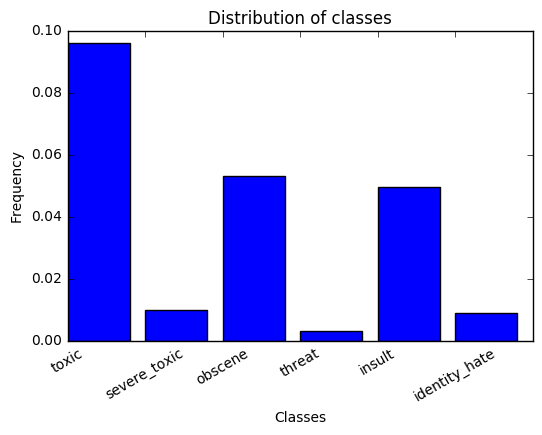

In [9]:
plt.bar(height = count_types, left = np.arange(len(count_types)))
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.xticks(np.arange(len(count_types)), train.columns[2:], rotation = 30)
plt.show()

In [10]:
train.comment_text[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [11]:
train.comment_text[np.where(train.threat == 1)[0][1]]

"I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms"

In [5]:
# replace and remove all numbers from comments
# all / from comments we'll remove too

import re

In [16]:
class Work_With_Strings:
    def __init__(self, df):
        self.df = df
        
    def without_flag(self):
        return self.df[(self.df.toxic != 1) & (self.df.severe_toxic != 1) & (self.df.obscene != 1) & (self.df.threat != 1) & (self.df.insult != 1) & (self.df.identity_hate != 1) ]
    
    def get_lower(self, string_column = 'comment_text' ):
        self.df[string_column] = list(map(lambda x: x.lower(), self.df[string_column]))
    
    
    def remove_https(self,string_column = None):
        self.df[string_column] = list(map(lambda x: re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE), self.df[string_column]))
        
        
    def fuck_variations(self, string_column = 'comment_text'):
        self.df[string_column] = list(map(lambda x: re.sub("securityfuck", "security fuck", x),  self.df[string_column]))
        fuck_list = ["f\*\*\*","f\*\*","f\*\*k",'f\%ck',"f\^ck","fu\*k","f'ck", "f!ck", "f$ck", "f@ck","f-ck","fu-k", "f'uck","fuckknuckle", "fukkk", "fcuk", "fukc", 
                    "fffffffff   uuuuuu     uuuuu   ccccccccccccc  kkkkk",
                    "fukk", "fu_ck", "fuicky", "fuycker",  "fucck", ' f ck ', ' fuk ', ' fucka ', ' fucky ', ' fock ', 
                    ' fucka ', ' fuckers ', ' f cker ', ' fukk ', ' fuckk ', ' fuc ', ' fu ck ']
        fucking_list = ["f u c k i n g", "fuck ing","fking", "fuckn","fuk1ng","fckin","fcker","fuk1ng","fucken","f-ng", "funcking","fxxcking", "fuckin", "fuking",
                       "fukin", 'fuckign ', ' f cking ', ' fcken ', ' ucking ', ' f cked ', ' fuckking ']
        drop_gg = ["fuckingg"]
        another_fuck_list = ['f u c k']
        mother_fuckers = ["mother fucker", " mothjer fucker", " mutha fcker", " muthafucka", " muthafucker", " motherf ", " motherfuck ",
                         ' mutha ', ' mutherfuckers ', " motha ", " muther ", ' mothafucka ', ' mothafucker ']
        mother_fucking = ["mother fucking"]
        for i in fuck_list:
            self.df[string_column] = list(map(lambda x: re.sub(i, "fuck", x), self.df[string_column]))
        for j in fucking_list:
            self.df[string_column] = list(map(lambda x: re.sub(j, "fucking ", x), self.df[string_column]))
        for k in drop_gg:
            self.df[string_column] = list(map(lambda x: re.sub(k, "fucking ", x), self.df[string_column]))
        for l in another_fuck_list:
            self.df[string_column] = list(map(lambda x: re.sub(l, "fuck", x), self.df[string_column]))
        for h in mother_fuckers:
            self.df[string_column] = list(map(lambda x: re.sub(h, "motherfucker ", x), self.df[string_column]))
        for g in mother_fucking:
            self.df[string_column] = list(map(lambda x: re.sub(g, "motherfucking ", x), self.df[string_column]))
            
            
    def homosexual_insults(self, string_column = 'comment_text'):
        faggot_list = ["faggot","f\*ggots","fagg\*t","fagot", "fagg0t", "fag0t", "f@gget", "faggoty", "faggy", "fgt", "faget", "f@ggot", "phaggot", "faggotttttttt", "f a g g o t", 
                      "faggit", "fagget", 'fagit', ' fagg ']
        for i in faggot_list:
            self.df[string_column] = list(map(lambda x: re.sub(i, " faggot ", x), self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("g@y", " gay ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("repulicansodomite", " republican sodomite", x),  self.df[string_column]))
        
    def different_insults(self, string_column = 'comment_text'):
        self.df[string_column] = list(map(lambda x: re.sub("arse", " ass", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("suckk", " suck ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("sukk", " suck ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" suk ", " suck ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" sucka ", " suck ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" dik ", " dick ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" cck ", " cock ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" stuped ", " stupid ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" stoopid ", " stupid ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("morron", " moron", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("fu.c.k.i.n.g", " fucking", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("st.u.p.id", "s tupid", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("nazisnazis", " nazis", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("wikinazis", " wiki nazis", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("wikinazis", " wiki nazis", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("fugly", " ugly ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("sh1t", " shit", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("sh\*\&", " shit", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("s\*it", " shit", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("tw\*t", " twat", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("dick-head", " dickhead", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("dick head", " dickhead ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("sonofabitch", " son of a bitch ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("ass-hole", " asshole ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("ass hole", " asshole ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("a\*\*h", " asshole ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("a\$\$ho", " asshole ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("azz", " ass ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("ashole", " asshole ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" sht ", " shit ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" shyt ", " shit ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("basterd", " bastard ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("fatass", " fat ass ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" asswhole ", " asshole ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" pennnis ", " penis ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" pneis ", " penis ", x),  self.df[string_column]))   
        bitch_list = ["b\*\*\*","b\*tch","b1tch", "bi\*c", "beetch", "biches", "biatch", "bithc", "b i t c h", ' b itch ', ' biitch ', ' bitchs']
        cunt_list = ["c\*nt","cuntt", "c u n t", "cu_nt", ' kunt ', 'cunting', 'cunty']
        dick_list = ["d1ck", "di_ck", "dikk", "d i c k"]
        cock_list = ["c0ck", "c@ck", "c o c k"]
        douchebag_list = ["douchbag", "douche bag", "doosh bag"]
        n_word = ["nig\*","n\*","niggas","nigga", "n i g g e r", "n i g e r", "niggar", " gger ", ' niqqa ', ' nigas ']
        for i in bitch_list:
            self.df[string_column] = list(map(lambda x: re.sub(i, " bitch ", x),  self.df[string_column]))
        for k in cunt_list:
            self.df[string_column] = list(map(lambda x: re.sub(k, " cunt ", x),  self.df[string_column]))
        for j in dick_list:
            self.df[string_column] = list(map(lambda x: re.sub(j, " dick ", x),  self.df[string_column]))
        for h in douchebag_list:
            self.df[string_column] = list(map(lambda x: re.sub(h, " douchebag ", x),  self.df[string_column]))
        for g in n_word:
            self.df[string_column] = list(map(lambda x: re.sub(g, " nigger ", x),  self.df[string_column]))
    
    
    def some_short_forms(self, string_column = 'comment_text'):
        self.df[string_column] = list(map(lambda x: re.sub("you're", "you are ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("we're", "we are ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("youre", "you are ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("'ll", " will ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("\n", " ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("'m", " am ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("it's", "it is ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("it's", "it is ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("she's", "she is ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("he's", "he is ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("let's", "lets ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("goin' ", "going ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("goin ", "going ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("going to", "gonna ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("!", " ! ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub("[^a-zA-Z0-9_!]", " ", x),  self.df[string_column]))
        
        
    def make_ngrams(self, string_column = 'comment_text'):
        self.df[string_column] = list(map(lambda x: re.sub(" where you live ", " where_you_live ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" die die ", " die_die ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" you die ", " you_die ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" kil ", " kill ", x),  self.df[string_column])) 
        self.df[string_column] = list(map(lambda x: re.sub(" kill yourself ", " kill_yourself ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" kill urself ", " kill_yourself ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" kill you ", " kill_you ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" kill you ", " kill_you ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" kill your ", " kill_you ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" you die ", " you_die ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" die you ", " die_you ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" die u ", " die_you ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" die !", " die_! ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" your house ", " your_house ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" rape your ", " rape_your ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" rape you ", " rape_you ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" your house ", " your_house ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" burn in hell ", " burn_in_hell ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" hunt you ", " hunt_you ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" must die", " must_die ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" murder you", " murder_you ", x),  self.df[string_column]))
        self.df[string_column] = list(map(lambda x: re.sub(" get raped", " get_raped ", x),  self.df[string_column]))
        
             
            
    def remove_digits(self,string_column = 'comment_text'):
        self.df[string_column] = list(map(lambda x: re.sub("\d", "", x),  self.df[string_column]))
        
    def delete_spaces(self, string_column = 'comment_text'):
        while self.df[self.df[string_column].str.contains("  ")].shape[0] > 0:
            self.df[string_column] = list(map(lambda x: re.sub("  ", " ", x),  self.df[string_column]))
            
    def delete_spam(self, string_column = 'comment_text'):
        Count_Word = train["comment_text"].apply(lambda x: len(str(x).split()))
        Count_unique_word = train["comment_text"].apply(lambda x: len(set(str(x).split())))

In [17]:
%%time
train_proba = Work_With_Strings(train)

Wall time: 0 ns


In [63]:
test_proba = Work_With_Strings(test)

In [18]:
%%time
train_proba.get_lower('comment_text')

Wall time: 399 ms


In [64]:
test_proba.get_lower()

In [19]:
%%time
train_proba.remove_https('comment_text')

Wall time: 1.49 s


In [66]:
test_proba.remove_https('comment_text')

In [20]:
%%time
train_proba.fuck_variations('comment_text')

Wall time: 31.1 s


In [67]:
test_proba.fuck_variations()

In [21]:
%%time
train_proba.homosexual_insults('comment_text')

Wall time: 7.64 s


In [68]:
test_proba.homosexual_insults()

In [22]:
%%time
train_proba.different_insults('comment_text')

Wall time: 29.7 s


In [69]:
test_proba.different_insults()

In [23]:
%%time
train_proba.some_short_forms('comment_text')

Wall time: 11.9 s


In [70]:
test_proba.some_short_forms()

In [24]:
%%time
train_proba.make_ngrams()

Wall time: 12.3 s


In [71]:
test_proba.make_ngrams()

In [25]:
%%time
train_proba.remove_digits('comment_text')

Wall time: 1.58 s


In [72]:
test_proba.remove_digits()

In [26]:
%%time
train_proba.delete_spaces('comment_text')

Wall time: 9.25 s


In [73]:
test_proba.delete_spaces()

In [27]:
train = train_proba.df

In [74]:
test = test_proba.df

In [28]:
train = train[train.comment_text != ""]

In [29]:
train = train[train.comment_text != " "]

In [416]:
from wordcloud import WordCloud, STOPWORDS

In [417]:
from PIL import Image

In [418]:
homer = np.array(Image.open("C:/Users/Krain/documents/toxic comments/homer.png"))

In [419]:
stopwords = set(STOPWORDS)

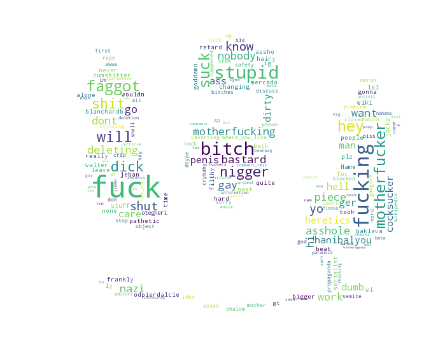

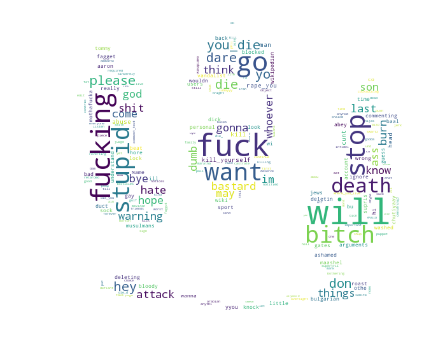

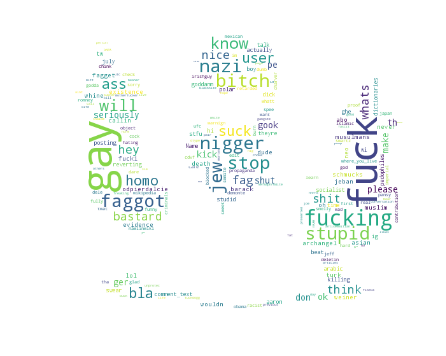

In [420]:
wc = WordCloud(background_color="white", max_words=10000, mask=homer,
               stopwords=stopwords)

# generate word cloud
wordcloud_severe = wc.generate(str(train[train.severe_toxic == 1].comment_text))
fig = plt.figure(1)
plt.imshow(wordcloud_severe)
plt.axis('off')
plt.show()
fig.savefig("word_sever.png", dpi = 1200)
wordcloud_threat = wc.generate(str(train[train.threat == 1].comment_text))
fig = plt.figure(2)
plt.imshow(wordcloud_threat)
plt.axis('off')
plt.show()
fig.savefig("word_threat.png", dpi = 1200)
wordcloud_identity = wc.generate(str(train[train.identity_hate == 1].comment_text))
fig = plt.figure(3)
plt.imshow(wordcloud_identity)
plt.axis('off')
plt.show()
fig.savefig("word_identity.png", dpi = 1200)

In [27]:
import gensim

C:\Users\Krain\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [28]:
import jellyfish
from pyjarowinkler import distance

In [29]:
def train_w2v(df, string_column = 'comment_text', bigrams = False, trigrams = False, size = 305, workers = 1, min_count = 5, sample = 0.05,sg = 1, iters = 5):
    sentences = [s.split() for s in list(df[string_column])]
    if bigrams == True:
        bigrams = gensim.models.Phrases(sentences)
        if trigrams == True:
            trigrams = gensim.models.Phrases(bigrams[sentences])
            model = gensim.models.Word2Vec(sentences= trigrams[bigrams[sentences]], size = size, workers = workers, min_count= min_count, sample = sample, sg = sg, iter = iters)
        else:
            model = gensim.models.Word2Vec(sentences= bigrams[[sentences]], size = size, workers = workers, min_count= min_count, sample = sample, sg = sg, iter = iters)
    else:
        model = gensim.models.Word2Vec(sentences= sentences, size = size, workers = workers, min_count= min_count, sample = sample, sg = sg, iter = iters)
        
    return model
    
def word_synonimes(word , model , top = 20, threshold = 0.69):
    list_of_synonimes = [model.wv.most_similar(word,topn= top)[i][0] for i in range(top)]
    distances = [distance.get_jaro_distance(word, list_of_synonimes[i]) for i in range(top)]
    indexes = [i for i,v in enumerate(distances) if v > threshold]
    return pd.DataFrame({'synonimes': [list_of_synonimes[i] for i in indexes], 'distance': [distances[i] for i in indexes]})

In [197]:
%%time
laja = train_w2v(train)

Wall time: 16min 50s


In [258]:
%%time
word_synonimes('fucking', laja, top = 50, threshold= 0.2)

Wall time: 387 ms


,distance,synonimes
0,0.55,faggeorge
1,0.51,vianello
2,0.51,hypocrit
3,0.80,freaking
4,0.40,cunty
5,0.75,effing
6,0.35,bitchass
7,0.81,fuckface
8,0.43,goddamn
9,0.51,cuntass


In [20]:
train['Count_Word'] = train["comment_text"].apply(lambda x: len(str(x).split()))
train['Count_unique_word'] = train["comment_text"].apply(lambda x: len(set(str(x).split())))

In [21]:
train['Percent_of_unique'] = train['Count_unique_word'] / train['Count_Word']

In [22]:
train = train[~train.comment_text.str.contains(' romney ')]

In [23]:
train = train[~train.comment_text.str.contains('supertrll')]

In [24]:
train = train[~((train.Percent_of_unique < 0.2) & (train.toxic == 0) & (train.obscene == 0) & (train.threat == 0) & (train.insult == 0))]

In [34]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer 

In [153]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, ElasticNet

In [ ]:
from sklearn.cross_validation import cross_val_score, KFold

In [81]:
def make_transformation(data, data_val = None, V = 1, min_df = 5, ngram = 3, stopwords = 1, column = 'comment_text'):
    
    """Функция предназначена для формирования исходной тренировочной выборки. 
    V - если 1, то tf_idf , иначе - count_vectorizer
    min_df - 5 
    ngram - (1,3)
    stopwords - если 1, то исключить слова из списка английских стоп-слов
    data - данные, к которым применить трансформацию
    column - поле с текстом"""
    
    if V == 1:
        if stopwords == 1:
            clf = TfidfVectorizer(min_df, ngram_range = (1, ngram), stop_words = ENGLISH_STOP_WORDS)
        else:
            clf = TfidfVectorizer(min_df, ngram_range = (1, ngram))
    else:
        if stopwords == 1:
            clf = CountVectorizer(min_df, ngram_range = (1, ngram), stop_words = ENGLISH_STOP_WORDS)
        else:
            clf = CountVectorizer(min_df, ngram_range = (1, ngram))
            
    if data_val == None:
        return clf.fit_transform(data[column])
    else:
        return clf.fit_transform(data[column]), clf.transform(data_val[column])

In [82]:
def train_cv_model(data_1, data_train, target, clf, parameter, folds =5, random_seed = 17, metrics = 'roc_auc'):
    """Доступные таргеты: toxic, severe_toxic, obscene, threat, insult, identity_hate"""
    Y = data_1[target]
    if clf == 'Ridge':
        model = RidgeClassifier(alpha = parameter)
    elif clf == 'SVM':
        model = SVC(kernel = 'linear', probability=True, C= parameter)
    fold = KFold(Y.size, n_folds = folds, shuffle= True, random_state= random_seed)
    score = cross_val_score(model, data_train, Y, metrics, fold)
    
    return score.mean()

In [111]:
def train_model(df ,train, test, target, clf, parameter, random_seed = 17):

    if clf == 'Ridge':
        model = RidgeClassifier(alpha = parameter)
    
    model.fit(X_train, df[target])
    
    result = model.decision_function(X_test)
    
    return np.exp(result) / (1 + np.exp(result))

In [85]:
def Ridge_Plot(scores, parameter):
    plt.plot(parameter, scores)
    plt.xlabel('Parameter value')
    plt.ylabel('ROC AUC on CV')
    plt.show()

In [78]:
%%time
X_train, X_test = make_transformation(train, test, ngram =3)

Wall time: 5min 14s


In [112]:
Ridge_Lambdas = [['toxic', 1], ['severe_toxic', 100], ['obscene', 10], ['threat', 10], ['insult', 1], ['identity_hate', 10]]

In [113]:
%%time
Predictions = [train_model(train, X_train, X_test, target = Ridge_Lambdas[i][0] , clf = 'Ridge', parameter= Ridge_Lambdas[i][1] , random_seed= 17) for i in range(len(Ridge_Lambdas))]

Wall time: 2min 26s


In [153]:
Base_Line = pd.DataFrame({'id': test['id'],'toxic': Predictions[0], 'severe_toxic': Predictions[1], 'obscene': Predictions[2], 'threat': Predictions[3], 'insult': Predictions[4], 'identity_hate': Predictions[5]})

In [159]:
column_order = ['id','toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

Base_Line[column_order].to_csv("BaseLine.csv", index = False)

In [148]:
%%time
Ridge_Scores =  [train_model(train, X_train, 'identity_hate', clf = 'Ridge', parameter = i, folds= 5, random_seed= 17, metrics= 'roc_auc' ) for i in alphas_identity]

Wall time: 29min 28s


In [145]:
# ridge toxic 0.1 1 10 trigram, 1 is the best
# ridge severe toxic 10 100  trigram, 100
# ridge obscene 10 trigram
# ridge threat 10 trigram
# ridge insult 1 trigram
# ridge identity 10 trigram

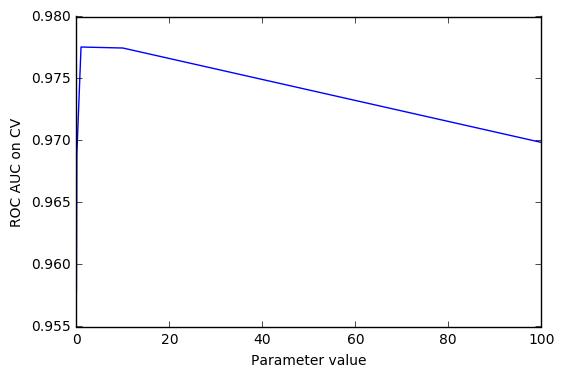

In [147]:
Ridge_Plot(Ridge_Scores, alphas_insult)